In [2]:
# Command to reload all modules before executing the code
%load_ext autoreload 
%autoreload 2

In [17]:
# ML libraries
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.metrics import accuracy_score
import xgboost as xgb
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
# Utils
import os
import sys
from collections import defaultdict
from tqdm import tqdm
import warnings
from typing import List, Dict, Any, Tuple, Union, Optional, Callable, TypeVar
# Project modules
from src.data_loading import load_dataframe_teamfeatures, load_dataframe_playersfeatures, load_dataframe_labels

warnings.filterwarnings('ignore')

In [19]:
df_teamfeatures_train = load_dataframe_teamfeatures("train")
df_teamfeatures_test = load_dataframe_teamfeatures("test")
df_labels = load_dataframe_labels(global_data_path="data_train")

In [5]:
df_teamfeatures_train.head()

,HOME_ID,HOME_LEAGUE,HOME_TEAM_NAME,HOME_TEAM_SHOTS_TOTAL_season_sum,HOME_TEAM_SHOTS_INSIDEBOX_season_sum,HOME_TEAM_SHOTS_OFF_TARGET_season_sum,HOME_TEAM_SHOTS_ON_TARGET_season_sum,HOME_TEAM_SHOTS_OUTSIDEBOX_season_sum,HOME_TEAM_PASSES_season_sum,HOME_TEAM_SUCCESSFUL_PASSES_season_sum,...,AWAY_TEAM_YELLOWCARDS_5_last_match_std,AWAY_TEAM_REDCARDS_5_last_match_std,AWAY_TEAM_OFFSIDES_5_last_match_std,AWAY_TEAM_ATTACKS_5_last_match_std,AWAY_TEAM_PENALTIES_5_last_match_std,AWAY_TEAM_SUBSTITUTIONS_5_last_match_std,AWAY_TEAM_BALL_SAFE_5_last_match_std,AWAY_TEAM_DANGEROUS_ATTACKS_5_last_match_std,AWAY_TEAM_INJURIES_5_last_match_std,AWAY_TEAM_GOALS_5_last_match_std
0,0,Ligue 1,Toulouse,3.0,2.0,5.0,2.0,1.0,2.0,2.0,...,5.0,5.0,4.0,0.0,6.0,8.0,4.0,3.0,2.0,3.0
1,1,Ligue 2,Brest,6.0,8.0,3.0,6.0,5.0,8.0,7.0,...,0.0,0.0,3.0,1.0,8.0,4.0,10.0,0.0,5.0,3.0
2,2,Serie A,Sampdoria,4.0,2.0,5.0,2.0,8.0,1.0,1.0,...,6.0,10.0,4.0,4.0,0.0,8.0,3.0,0.0,9.0,6.0
3,3,League One,Coventry City,7.0,5.0,5.0,6.0,6.0,9.0,9.0,...,0.0,0.0,1.0,2.0,0.0,5.0,6.0,3.0,NaN,2.0
4,4,Premier League,Wolverhampton Wanderers,3.0,3.0,2.0,3.0,4.0,4.0,3.0,...,1.0,0.0,4.0,4.0,9.0,4.0,1.0,4.0,6.0,5.0


In [6]:
# Count unique values of column "HOME_TEAM_NAME"
for col in df_teamfeatures_train["HOME_TEAM_NAME"].unique():
    print(col, df_teamfeatures_train["HOME_TEAM_NAME"].value_counts()[col])

Toulouse 44
Brest 44
Sampdoria 49
Coventry City 35
Wolverhampton Wanderers 33
Sporting CP 45
Sevilla 51
Bordeaux 43
Lyngby 28
Borussia Dortmund 42
Genoa 49
Nîmes 44
Standard Liège 40
Urawa Reds 45
Crewe Alexandra 38
Celta de Vigo 48
Lincoln City 35
Colón 22
Grêmio 50
Troyes 42
Inter 50
Sassuolo 49
Racing Club 21
Chapecoense 32
Tottenham Hotspur 31
FC Groningen 37
Walsall 58
Levante 49
SC Heerenveen 38
SønderjyskE 41
Lorient 42
Sanfrecce Hiroshima 43
Real Valladolid 51
Paris Saint Germain 44
Yokohama 14
Colchester United 57
Blackpool 34
América Mineiro 17
Sint-Truiden 36
Stevenage 57
Bradford City 55
Cerezo Osaka 42
Milan 50
Yokohama F. Marinos 44
Flamengo 49
Vitesse 42
Nagoya Grampus 45
Brighton & Hove Albion 32
West Ham United 29
Olympique Lyonnais 42
Patronato 21
Hertha BSC 44
Carlisle United 57
Fortuna Sittard 40
Fleetwood Town 37
Juventus 51
Portsmouth 39
Belenenses 45
Northampton Town 39
Notts County 21
Gillingham 34
Atlético GO 16
Sunderland 38
Norwich City 16
Marítimo 43
Kashima

In [12]:
# Count unique values of column "AWAY_TEAM_NAME"
for col in df_teamfeatures_train["AWAY_TEAM_NAME"].unique():
    print(col, df_teamfeatures_train["AWAY_TEAM_NAME"].value_counts()[col])
    
len(df_teamfeatures_train["HOME_TEAM_NAME"].unique())

Olympique Marseille 42
Red Star 17
Bologna 48
Bolton Wanderers 35
Leicester City 33
Desportivo Aves 28
Real Sociedad 47
Rennes 38
OB 46
FC Union Berlin 30
Sassuolo 49
Lorient 43
Antwerp 37
Gamba Osaka 43
Cambridge United 59
Real Valladolid 48
Waasland-Beveren 36
Morecambe 59
Godoy Cruz 23
Ceará 50
Valenciennes 43
Lazio 49
Defensa y Justicia 23
Internacional 49
Wolverhampton Wanderers 33
VVV-Venlo 36
Portsmouth 36
Sevilla 48
Horsens 41
Monaco 45
Leeds United 11
Sagan Tosu 43
Strasbourg 42
Valencia 48
Montpellier 40
Kashiwa Reysol 31
Carlisle United 56
Fortaleza 32
Lincoln City 36
Chapecoense 34
Gent 42
Newport County 59
Sunderland 37
Yokohama F. Marinos 43
Chievo 16
Kawasaki Frontale 45
FC Emmen 38
Vissel Kobe 43
Newcastle United 32
Crystal Palace 28
Lanús 22
Northampton Town 37
RKC Waalwijk 21
Barnsley 20
Nice 42
Atalanta 48
Peterborough United 35
Sporting Braga 43
Notts County 19
Grimsby Town 56
Rochdale 37
Bordeaux 44
Bragantino 17
Portimonense 44
Shonan Bellmare 44
Tranmere Rovers 5

350

In [8]:
# Check if unique values of column "AWAY_TEAM_NAME" are the same as unique values of column "HOME_TEAM_NAME"
for col in df_teamfeatures_train["HOME_TEAM_NAME"].unique():
    if col not in df_teamfeatures_train["AWAY_TEAM_NAME"].unique():
        print(f"WARNING: {col} is not in df_teamfeatures_train['AWAY_TEAM_NAME'].unique()")

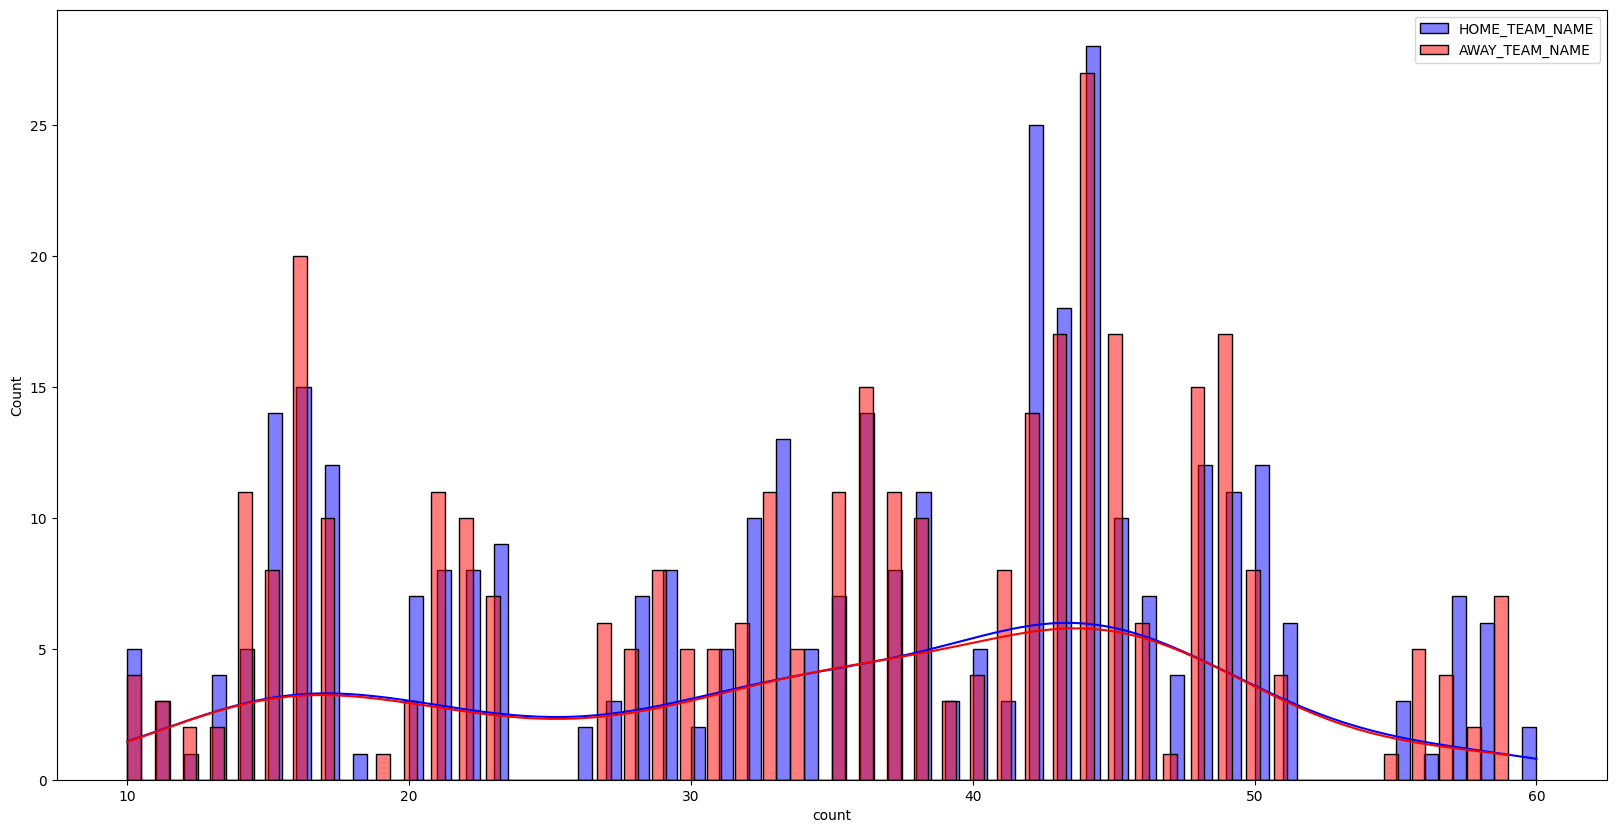

In [9]:
# Plot the distribution of number of games played by each team
plt.figure(figsize=(20, 10))
sns.histplot(df_teamfeatures_train["HOME_TEAM_NAME"].value_counts(), kde=True, color="blue", label="HOME_TEAM_NAME", bins=100)
sns.histplot(df_teamfeatures_train["AWAY_TEAM_NAME"].value_counts(), kde=True, color="red", label="AWAY_TEAM_NAME", bins=100)
plt.legend()